# Data: Past, Present, Future |  Lab 5  |  2/21/2018


# Principal Component Analysis & the pleasures (and hubris) (and poverty) of classification

<hr>
### DISCUSSION SUMMARY¶

#### PART 1: A BLISTERINGLY SHORT INTRO TO Principal Component Analysis (PCA)

    1. Pearson, Spearman, and Intelligence
    
    2. PCA & Dimensionality Reduction
    
    3. A) Attending to the flowers: PCA and the Iris data set
    
    3. B) Inventing IQs: PCA and Spearman data set
    
    4. Choose your own adventure...

#### PART 2: Imagining Communities using texts

    1. Using words as features
        - Words as Vectors in unique dimensions
    
    2. Imagining political communties / political discourse
    
    3. Try this at home: PCA on your own texts


In [1]:
# Some libraries we'll need...

import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA 
import matplotlib.pyplot as plt
import matplotlib 
import text_analysis as ta 
import numpy as np
import re

### Part 1: PCA and Intelligence Measuring

#### 1. Pearson, Spearman, and Intelligence 
- See Desrosieres, *The Politics of Large Numbers*, chap 4, 145-146.
- See also C. Spearman, "'General Intelligence,' Objectively Determined and Measured", *The American Journal of Psychology* 15, no 2 (Apr., 1904), 201-292.

Imagine that, like Spearman, you want to try to measure intelligence: and, again following Spearman's lead, you think that there's multiple kinds of intelligences one can have and produce a test to measure each of these kinds of intelligence. (There could be many reasons why you think there's 7 kinds of intelligence rather than 122 kinds or 2 kinds--but any reasons we *do* provide will depend on some conception of culture. More to the point, any definition of *intelligence* is always political.)

Let's say, for the sake of this example, that you believe there are 7 distinct kinds of intelligence. Thus, for each person, you have an array of 7 observations: $I_1, I_2, I_3,...I_7$. You'd like to understand (1) how the individual relates to a population and (2) how the entire sample population is distributed. If you think that each kind of intelligence is as important as every other kind of intelligence, you might give each $I_i$ its own dimension, giving you a 7-dimensional plot, which is very difficult to visualize or draw:

![7-features](7-features.jpeg)

Since it's difficult to visualize anything more than 3 dimensions, and it's usually much easier to visualize something in 2 dimensions, we'd like a way to squeeze this 7-dimensional data into 2-dimensions (or, in the case of Spearman, to squeeze the data into 1-dimension). How might we visualize this 7-dimensional data while retaining the distinctive patterns in the data? 

#### 2. PCA & Dimensionality Reduction
Let's say we have a lot of different kinds of observations for a particular kind of "object" (e.g., flowers, people, cars, GDPs, statistical entities...) and we want to compare them to *classify* and *then take action*.

<b>1. Writing down the data</b>

To continue our earlier example, to combine different "intelligences" of a particular person $p_i$, we write down each attribute with its corresponding dimension (which is easy to write mathematically though it is difficult to draw):

$p_i = I_1 + I_2 + I_3 + I_4 + I_5 + I_6 + I_7$

where each $I_i$ is a vector that is [orthogonal](https://en.wikipedia.org/wiki/Orthogonality) to every other $I_i$.

Our sample population is $\sum_{i = 1}^{n}p_i$

<b>2. Identify a new 2-dimensional subspace from the data</b>
Next, we determine a line that maxmizes the variance in the 7-dimensional data (i.e., we produce a line via the method of least squares), and label this line "principal component 1" or just "PC 1". We also produce a second line that is perpendicular to PC 1 and that also maximized the variance in the 7-dimensional data--we label this second line "principal component 2" or just "PC 2". 

Using PC 1 and PC 2, we define a new 2-dimensional subspace and plot all the data as *projections* into this new subspace. (Note: we're losing some data by doing this!)


<hr>

<b> For the more mathematically-inclined, we're doing the following:</b> 
1. Computing eigenvectors and eigenvalues from a covariance or correlation matrix
2. Sorting eigenvalue from greatest to lowest, and pick the the greatest corresponding eigenvectors for the number of K dimensions we want (in our case, just 2 dimensions)
3. Constructing a new subspace of 2 dimensions from the first two greatest eigenvectors we selected in step 2.
4. Projecting data into the new subspace we created in step 3.   

For a more detailed discussion of the math involved, see [here](https://plot.ly/ipython-notebooks/principal-component-analysis/#PCA-and-Dimensionality-Reduction)


#### 3a. Stop and observe the flowers: The famous Iris data set

First, where did this data set come from? How many features does it describe? How was the data collected and to what purpose?

For details about the contents of the data set, see https://archive.ics.uci.edu/ml/datasets/Iris/. 

For details about the historical origins of the data set, see here: https://en.wikipedia.org/wiki/Iris_flower_data_set. The dataset was popularized (but apparently not originally produced) in R. A. Fisher's "The use of multiple measurements in taxnomic problems," *Annual Eugenics* 7, Part II, 179-188 (1936); see also in *Contributions to Mathematical Statistics* (John Wiley, NY, 1950). 

In [2]:
## Quick way to ingest CSV data from ML data repository.
flowers = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

#rename column headings
flowers.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

#cleans NA entries 
flowers.dropna(how="all", inplace=True) # drops the empty line at file-end

#Let's inspect the dataset directly via panda's head()
flowers.head() #here we can see how the csv is structured

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# And here we can see that it's composed of 50-samples 
# of 3 kinds of flower, with 4 features per flower. Note
# that we have no missing values in the data set! Yay! 

flowers.groupby(by="class").count()

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [4]:
## make table of iris data X 

# Note that .ix[] here is a "label-location based indexer" function
# for comparsion between .ix, .iloc, and .loc, see http://stackoverflow.com/questions/31593201/pandas-iloc-vs-ix-vs-loc-explanation
iris_X = flowers.ix[:,0:4].values #take all rows and the first 4 columns (in this case, the features)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [5]:
#...and class labels Y (as an array)
label_of_flower = flowers['class'].tolist()

In [6]:
# perform pca, pick number of dimensions...
iris_pca_model = sklearnPCA(n_components=2)
iris_pca_coordinates = iris_pca_model.fit_transform(iris_X)

/usr/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


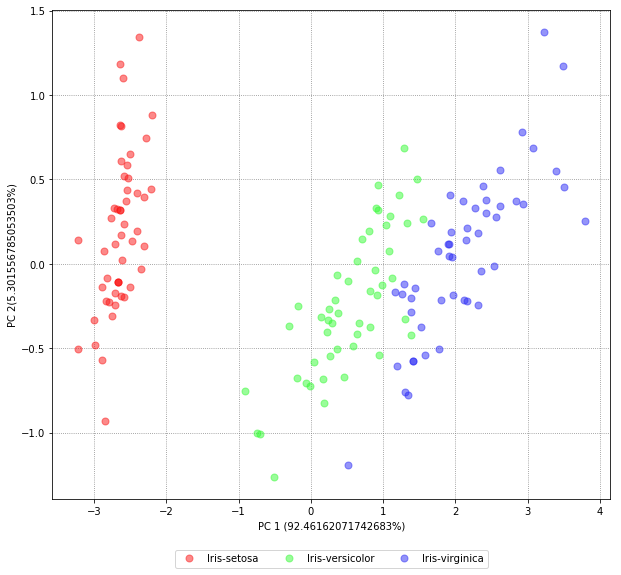

In [8]:
## PLOT IRIS DATA  ------
## RUN TWICE TO GET IT TO DISPLAY PROPERLY (this is a bug in matplotlib)

# GENERATE COLORS FOR PLOT ---
## randomly pick RBG colors for each "class"
number_of_flower_classes = 3 #change based on how many documents you have
colors = ta.generate_colors(3) #list of colors

# ASSIGN COLORS FOR EACH IRIS FLOWER --- 
colors_for_flowers = []
color_index = []
unique_label = list(set(label_of_flower))
for flower in label_of_flower:
    for kind in range(0, len(unique_label)):
        if flower == unique_label[kind]:
            color_index.append(kind)
            #print(colors[kind])
            colors_for_flowers.append(colors[kind])
            break

# PLOT PCA DATA --- 
## plot actual PCA data
label_seen = set()
for flower in range(0, len(iris_pca_coordinates)):
    plt.plot(iris_pca_coordinates[flower, 0], iris_pca_coordinates[flower, 1], 'o', markersize =7, alpha=0.5, color=colors_for_flowers[flower], label=label_of_flower[flower] if label_of_flower[flower] not in label_seen else None)
    label_seen.add(label_of_flower[flower])
##plot labels   
plt.xlabel('PC 1 ('+str(iris_pca_model.explained_variance_ratio_[0]*100)+'%)') #x-axis title
plt.ylabel('PC 2('+str(iris_pca_model.explained_variance_ratio_[1]*100)+'%)') #y-axis title
plot_size = 10 # change to change plot size
matplotlib.rcParams['figure.figsize'] = (plot_size, plot_size) #size of graph generated in notebook

##legend generation
plt.legend()  #generate legend explicitly
ax = plt.subplot(111) #used in making legend
plt.xlabel
plt.grid(b=True, which='major', color='gray', linestyle='dotted') # Add gridlines
## legend placement (outside of plot)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9]) ## Shrink current axis's height by 10% on the bottom
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.15), fancybox=True, shadow=False, ncol=5) # Put a legend below current axis
plt.show()

<b>What have we done here?</b> We've taken for features for each flower (sepal length & width, petal length & width), and found a way to project this 4-dimensional data into the 2-dimensional plot above. 

Note that nearly 92.5% of the variance is "described" (i.e., fitted) by PC 1, but only 5.3% of the variance is described by PC 2. That means the graph above describes about 97.8% of the variance in the data! If we have confidence in the data, we may be confident that we've retained meaningful struture of the data, despite the fact that we have "judiciously" thrown out data... 

###### 3a. Inventing Intelligence and exploratory data analysis

Spearman argues that there is a
> relation of _any common and essential element in the Intelligences to any common and essential element in the Sensory Functions._ For brevity, we term these common elements "General Intelligence" and "General Discrimination[...]"[1]

He is arguing that "from several observed correlations we are able to deduce a single true one" and that "this latter alone is of real scientific significance".[2] Let's use principal component analysis to explore his data and consider his claimed correlations between "general discrimination" and "general intelligence." 

<small>[1] Spearman, "General Intelligence," Objectively Determined and Measured," _American Journal of Psychology_ 15, no. 2 (1904): 201-292.

[2] Spearman, 256.</small>

Let's begin by taking Spearman's data for school children as reported by Spearman (see page 286, "series I"), which we provide in the following file:

In [9]:
SpearmanObservations = pd.read_csv(
    filepath_or_buffer='./dat/spearman-286-seriesI.csv', 
    sep=',')

SpearmanObservations

,sex,age,pitch,light,weight,common sense A,common sense B,cleverness
0,f,11.500,8,4,4,6,5,2
1,m,12.916,15,3,4,11,7,22
2,f,12.666,14,6,4,16,10,7
3,f,13.666,13,4,9,1,1,1
4,m,11.333,5,14,7,3,2,3
5,f,11.916,25,7,4,10,14,9
6,f,11.250,10,19,8,8,19,12
7,f,13.083,10,12,10,2,4,6
8,m,12.416,18,11,9,5,6,11
9,m,12.583,14,30,7,21,22,19


Now we produce the same plot that we did above for the iris data:

/usr/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


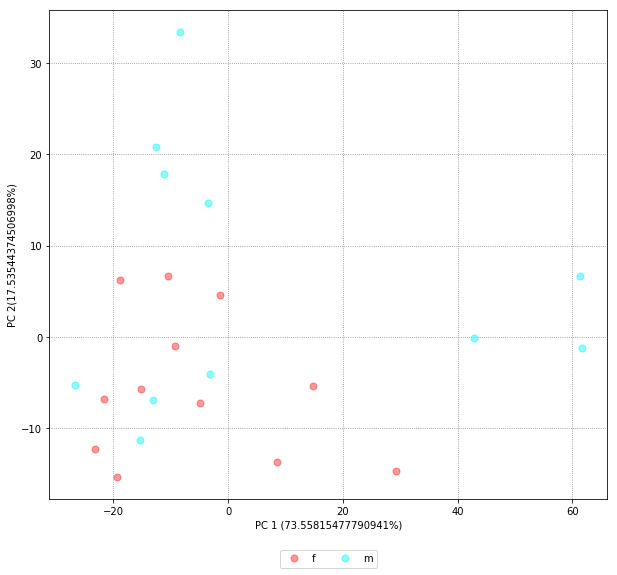

In [11]:
## MAKE LIST OF SPEARMAN DATA ------
# Note that .ix[] here is a "label-location based indexer" function
# for comparsion between .ix, .iloc, and .loc, see http://stackoverflow.com/questions/31593201/pandas-iloc-vs-ix-vs-loc-explanation
spearman_data_X = SpearmanObservations.ix[:,2:7].values #take all rows and the last 6 columns (i.e., we throw out sex and age)

#...and class labels Y (as an array)
spearman_labels = SpearmanObservations['sex'].tolist()

# perform pca, push 6 kinds of observations into 2 dimensions (i.e., a two-axis plot) 
pca_model = sklearnPCA(n_components=2)
pca_coordinates = pca_model.fit_transform(spearman_data_X)

## PLOT IRIS DATA -----
## RUN TWICE TO GET IT TO DISPLAY PROPERLY (this is a bug in matplotlib)

# GENERATE COLORS FOR PLOT ---
## randomly pick RBG colors for each "class"
number_of_classes = 2  # data set lists "male" and "female" 
colors = ta.generate_colors(2) # make list of colors

# ASSIGN COLORS FOR EACH SEX --- 
colors_for_sex = []
color_index = []
unique_label = list(set(spearman_labels))
for sex in spearman_labels:
    for kind in range(0, len(unique_label)):
        if sex == unique_label[kind]:
            color_index.append(kind)
            #print(colors[kind])
            colors_for_sex.append(colors[kind])
            break

# PLOT PCA DATA --- 
## plot actual PCA data
label_seen = set()
for person in range(0, len(pca_coordinates)):
    plt.plot(pca_coordinates[person, 0], pca_coordinates[person, 1], 'o', markersize =7, alpha=0.5, color=colors_for_sex[person], label=spearman_labels[person] if spearman_labels[person] not in label_seen else None)
    label_seen.add(spearman_labels[person])
##plot labels   
plt.xlabel('PC 1 ('+str(pca_model.explained_variance_ratio_[0]*100)+'%)') #x-axis title
plt.ylabel('PC 2('+str(pca_model.explained_variance_ratio_[1]*100)+'%)') #y-axis title
plot_size = 10
matplotlib.rcParams['figure.figsize'] = (plot_size, plot_size) #size of graph generated in notebook

##legend generation
plt.legend()  #generate legend explicitly
ax = plt.subplot(111) #used in making legend
plt.xlabel
plt.grid(b=True, which='major', color='gray', linestyle='dotted') # Add gridlines
## legend placement (outside of plot)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9]) ## Shrink current axis's height by 10% on the bottom
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.15), fancybox=True, shadow=False, ncol=5) # Put a legend below current axis
plt.show()

#### Some observations regarding our PCA graph and Spearman's data:

(1) Men and women do not appear to be very representative (men exist at extremes; women loosely cluster). It's surprising that Spearman wouldn't have been surprised by this distribution in which mens traits are more extreme. We haven't actually interrogated how Spearman's data was created here, but there is little reason to trust his observations. In any case, this is certainly a shockingly small number of individuals to argue for his existential claims about "general intelligence."  

(2) We find that the first principal component "describes" 73.6% of variance, but that the second still "describes" 17.5%. Not a strong case for a single "unity" of cause. Furthermore, the total variance being shown in the graph is only 91.094%. That means there are still a number of other axes (not shown) that are describing the remaining 9% of the data. This is suggestive that Spearman's claims of one "general intelligence" is not very strongly supported by even his own data.    

(3) We haven't included age, but if you rerun the above analysis and include age, it doesn't change the results much. His data set spans roughly 3.8 years of difference in observed ages. And yet, 3.8 years is a fairly large distribution of ages for a single class. What exactly are the circumstances in which this range of ages has arisen? And what individuals were thrown out? (These should also be reported, but Spearman does not do this.) 

#### 4. Choose your own adventure...

Now that you've seen how to do PCA, it's time for you to try it out on a data set of your choosing. 

First, go the [machine learning repository](https://archive.ics.uci.edu/ml/datasets.html?format=&task=cla&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table) and pick a data set you'd like to examine. 

Next, to download the data set directly into Pandas, INSERT THE ADDRESS FOR THE DATA SET YOU CHOOSE BELOW. (The address should end with ".data".) 

In [ ]:
## Quick way to ingest CSV data from ML data repository.
your_df = pd.read_csv(
    filepath_or_buffer='repository_address_that_ends_in_.data', #CHANGE 
    header=None, 
    sep=',')

After ingesting the data, take a look at how the data is organized...

In [ ]:
## Insert code to look at data using pandas 
# ...

Now rename your column labels to make it easier to manipulate...

In [ ]:
#rename column headings
your_df.columns=[INSERT_YOUR_NEW_COLUMN_LABELS_HERE--where_each_column_is_separated_by_commas]

Use the Iris example above to perform PCA on your data below. 


In [ ]:
#INSERT YOUR PCA CODE HERE...

## Part 2:  Imagining communities via their textual traces

#### 1. Using words as features
We can use PCA to examine collections of texts. To do this, we treat each word as a feature.

Thus for a corpus with just two texts of two words each, namely, $T_1 = (the, the)$ and $T_2 = (the, moose)$, we would draw:

![Words](Words.jpeg)

For each additional text $T_i$, we'd add a new data point in the plot above. For each additional *word* in the corpus, we'd add a new dimension to the plot above. If our corpus has a million words, our plot above would have a million dimensions. As above, we'll use PCA to reduce a high-dimension data set into a 2-dimension data set that we can easily visualize. 

#### Let's take a small sample of tweets: US politicians (and their offices) for 1 day. 

In [20]:
# Here's a bunch of tweets from senators and their aids on 29 Jan 2017

tweets = pd.read_csv('Jan_2017_tweets.csv')
tweets

,id,user_id,created_at,tweet_text,hashtag_entities
0,825817400465571841,76649729,2017-01-29 21:26:25,"RT @GOPHELP: Betsy DeVos says in letter - ""I a...",{}
1,825725985458880514,76649729,2017-01-29 15:23:10,"RT @GOPHELP: Op-ed in @memphisnews:""DeVos has ...",{}
2,825839671208972290,817076257770835968,2017-01-29 22:54:55,RT @JCColtin: @RepEspaillat inauguration going...,{}
3,825820208736718850,817076257770835968,2017-01-29 21:37:35,RT @NYCMayor: We're the safest big city in Ame...,{}
4,825820131196620800,817076257770835968,2017-01-29 21:37:16,RT @NYCMayor: I'll be joining New Yorkers at B...,{}
5,825820092684496903,817076257770835968,2017-01-29 21:37:07,RT @NYCMayor: There is something more importan...,{BatteryPark}
6,825819737217183745,817076257770835968,2017-01-29 21:35:42,RT @LizRittr: .@BilldeBlasio to @jeffsessions:...,{}
7,825819634402213888,817076257770835968,2017-01-29 21:35:18,Thank you @SenSchumer for your remarks today @...,{NY13}
8,825808721288822784,817076257770835968,2017-01-29 20:51:56,RT @jonorcutt: Great rallying cries from @RepE...,{}
9,825808666012090368,817076257770835968,2017-01-29 20:51:43,"RT @altochulo: No justice, no peace! cries @Re...",{NoBanNoWall}


In [21]:
# How many unique twitter accounts exist in this data set?
len(tweets.user_id.unique())

61

In [22]:
# How many tweets are contained in the data set?
len(tweets)

1183

In [23]:
# How many years does this data set cover? When does it start and when does it end?

earliest_tweet_date = tweets['created_at'].min()
print("earliest tweet date", earliest_tweet_date)

latest_tweet_date = tweets['created_at'].max()
print("latest tweet date", latest_tweet_date)

earliest tweet date 2017-01-29 00:05:49
latest tweet date 2017-01-29 23:58:10


### Here we propose to do something very bad with data. We're going to take these tweets and, using PCA, imagine communtities of affective affinity or political belief in two ways: 
1. by looking at individual hashtag use to make inferences about existing communities; 
2. by looking at individual language usage to postulate shared affect. 

It's important to stress that we don't think this is a particularly creditable or justifiable approach, but it does serve to illustrate a fairly predominant trend in which some data is used to posit the existence of different communities and to make claims about individuals.    

#### We're going to need some handy functions for stuff we're going to do again and again below. 
You don't need to pay to much attention to the details below, but you should note that functions are very handy for repetitive tasks. You must run the box below in order to use these functions. 

In [24]:
def count_words(list_to_search): #uses single_type_count() to count all tokens
    unique_words = set(list_to_search)
    word_counts = {}
    for word in unique_words:
        word_counts[word] = single_type_count(word, list_to_search)
    return word_counts # dict w/ word counts

def single_type_count(token_to_count, list_to_search): #counts up all tokens of a single type
    number_of_tokens = 0                            
    for token in list_to_search:                   
        if token == token_to_count:                 
            number_of_tokens += 1                   
    return number_of_tokens #returns int

def total_number_of_words(dict_of_word_counts): #for use with token_counts
    number_of_words = 0
    for word in dict_of_word_counts:
        number_of_words = number_of_words + dict_of_word_counts[word]
    return number_of_words #returns int

def total_number_of_words_in_corpus(list_of_total_word_counts):
    total_number_of_words = 0
    for total in range(0,len(list_of_total_word_counts)):
        total_number_of_words = total_number_of_words + list_of_total_word_counts[total]
    return total_number_of_words #returns int

def get_word_frequencies(dict_of_words_with_counts, total_number_of_words_in_text):
    word_freq = {}
    for word in dict_of_words_with_counts:
        word_freq[word] = dict_of_words_with_counts[word]/total_number_of_words_in_text
    return word_freq # dict with word w/ normalized frequencies

def word_freq(word_counts, corpus_word_count):
## calculate word frequencies for any set of distinct items (e.g., texts, chunks, topic models, etc.)
    word_frequencies = []
    for text in range(0, len(word_counts)):
        word_frequencies.append(get_word_frequencies(word_counts[text],corpus_word_count)) 
    return word_frequencies

def obtain_MFW(word_frequencies, compared_to_which_text, textnames):
#USEFUL FOR EXAMINING MOST FREQUENT WORDS IN WORD LIST
#Uses Pandas to sort word frequencies and fill empty cells
#Returns dataframe "MFW"
    readable_word_frequencies = pd.DataFrame(word_frequencies).T
    #compared_to_which_text = 0 # column identifer for a particular text; full list in "novelnames"
    MFW = readable_word_frequencies.sort_values([compared_to_which_text], ascending = False)
    MFW = MFW.fillna(0) # fill all empty cells with zeros   
    print("Columns are users/texts")
    print("Rows are words/hashtags")
    return MFW

def PCAnalysis(word_frequencies, number_of_MFWs_used, corpus_word_count, number_of_components, text_index_to_compare_MFWs):
## APPLY PCA TO WORD FREQUENCIES LIST
## IF number_of_MFWs_used == 0, USE ALL WORDS IN LIST.
    ## prepare word_frequencies for PCA processing
    print("Corpus Word Count:" + str(corpus_word_count))
    if number_of_MFWs_used == 0:
        print("""Using corpus word count (""" + str(corpus_word_count) + """ words) for PCA in """ + str(number_of_components) + """-dimensions...""")
        number_of_MFWs_used = corpus_word_count
        # Note: There's probably a faster way than performing to T operations in the next 3 lines...
        dataframe_word_frequencies = pd.DataFrame(word_frequencies).T
        MFW = dataframe_word_frequencies.sort_values([text_index_to_compare_MFWs], ascending = False)
        MFW_for_PCA = MFW.fillna(0).as_matrix().T #using all MFWs
    else:
        print("Using " + str(number_of_MFWs_used) + " words for PCA in "+ str(number_of_components) + "-dimensions...")  #np.nan_to_num(word_frequencies[number_of_MFWs_used:])
        #Note: There's probably a faster way than performing to T operaions in the next 3 lines
        dataframe_word_frequencies = pd.DataFrame(word_frequencies).T
        MFW = dataframe_word_frequencies.sort_values([text_index_to_compare_MFWs], ascending = False)
        MFW_for_PCA = MFW.head(number_of_MFWs_used).fillna(0).as_matrix().T #using X of MFWs
    ## generate data points of PCA from MFW_for_PCA (this is where PCA is performed)
    pca_coordinates, pca_results = perform_PCA(MFW_for_PCA, number_of_components)   
    return pca_coordinates, pca_results

def perform_PCA(MFWlist_array_for_PCA, num_of_PCs):
#perform PCA on using the MFW lists for a set of texts
    pca_results = sklearnPCA(n_components = num_of_PCs)
    pca_coordinates = pca_results.fit_transform(MFWlist_array_for_PCA) #array of x- & y-coordinates 
    return pca_coordinates, pca_results

def plot_PCA(pca_coordinates, pca_results, colors_for_texts, textnames, plot_size, output_flag, plot_name):
## plot PCA graph without any description/labeling of texts; 
## set output_flag = 1 to produce PDF, 2 to produce PNG, else output = 0   
    ## (1) prepare color scheme, data point style & labels ---
    for text in range(0, len(pca_coordinates)):        
        plt.plot(pca_coordinates[text,0],pca_coordinates[text,1], 'o', markersize=7, color=colors_for_texts[text], alpha=0.5, label=textnames[text])
    ## (2) graph display parameters & labels ---
    plt.xlabel('PC 1 ('+str(pca_results.explained_variance_ratio_[0]*100)+'%)') #x-axis title
    plt.ylabel('PC 2('+str(pca_results.explained_variance_ratio_[1]*100)+'%)') #y-axis title
    matplotlib.rcParams['figure.figsize'] = (plot_size, plot_size) #size of graph generated in notebook
    ##plt.axis('tight') #OR just fit plot around data automatically; but this usually fits *so* closely that it misses data
    plt.title('PCA for ' + str(len(textnames)) + 'users') #title of plot
    plt.grid(b=True, which='major', color='gray', linestyle='dotted') # Add gridlines
    ## (3) "print-ready" plots ---
    ## need to produce these files before 'plt.show' since that command erases graph parameters
    if output_flag == 1:
        plt.savefig(plot_name + '.pdf', dpi=600) #to produce a PDF of plot_PCA
    if output_flag == 2:
        plt.savefig(plot_name + '.png', dpi=600) #to produce a png of plot
    if output_flag != 1 & output_flag != 2 & output_flag != 0:
        print("Warning: output_flag for PCA plot not set to 0, 1, or 2")
        print("see plot_PCA_with_labels function")
    plt.show() ## (4) plot PCA graph to screen ---
    return

def assign_text_colors_via_word_counts(total_word_counts_nparray, total_word_counts):
## assigns colors for texts based on their relative word counts
## uses the word_count_binning function
    n, bins = word_count_binning(total_word_counts_nparray) #produce binning for all texts or text chunks in corpus
    text_binning = [] #identifies the bin in which a text belongs, where the text index is the same used in total_word_counts
    for text in range(0, len(total_word_counts_nparray)):
        for bin in range (0, len(bins)):
            if (total_word_counts[text] >= bins[bin]) & (total_word_counts[text] <= bins[bin+1]):
                text_binning.append(bin)
                break
    colors = generate_spectrum_of_colors(len(n))
    colors_for_texts = [] #identifies the color of a text, where the text index is the same used in total_word_counts
    for text in range(0, len(text_binning)):
        colors_for_texts.append(colors[text_binning[text]])
    return colors_for_texts

def word_count_binning(total_word_counts_numpy_array):
## generates historgram data for all texts or text chunks, based on word count,
## but does not output histogram plot; number of bins set to 37
    ## (1) generate histogram of data ---------------------------------
    n, bin_location_list, patches = plt.hist(total_word_counts_numpy_array, 37, facecolor='red', alpha=0.75) #plt.hist(total_word_counts_array, 2, normed=1, facecolor='red', alpha=0.75)
    #TEST: print("contents of bins: " + str(n))
    #TEST: print("bin location intervals: " + str(bin_location_list))
    plt.close()
    return n, bin_location_list 

def generate_spectrum_of_colors(num_colors): 
# generates a spectrum of colors--from red to black--for use in matplotlib;
    import colorsys
    spectrum_of_colors = []
    hue = 355/360
    for i in np.arange(0., 100., 100. / num_colors):
        lightness = i/100
        saturation = i/100
        spectrum_of_colors.append(colorsys.hls_to_rgb(hue, lightness, saturation))
    return spectrum_of_colors

def plot_PCA_with_labels(pca_coordinates, pca_results, textnames, colors_for_texts, plot_size, output_flag, plot_name):
## plot PCA graph using "arrow" labels; set output_flag = 1 to produce PDF, 2 to produce PNG, else output = 0
## WARNING: Using some styles for plt.style.use() will *break* arrow labels. For instance,
## plt.style.use('ggplot') breaks arrows. Accordingly, this function sets plt.style.use('classic')
    ## (0) invoke plt.style that works with arrow labels
    plt.style.use('seaborn-whitegrid') #works w/ 'seaborn-ticks', 'seaborn-white', classic'
     ## (1) prepare color scheme, data point style & labels ---
    for text in range(0, len(pca_coordinates)):
        plt.plot(pca_coordinates[text,0],pca_coordinates[text,1], 'o', markersize=7, color=colors_for_texts[text], alpha=0.8, label=textnames[text])
    ## (2) graph display parameters & labels ---
    plt.xlabel('PC 1 ('+str(pca_results.explained_variance_ratio_[0]*100)+'%)') #x-axis title
    plt.ylabel('PC 2 ('+str(pca_results.explained_variance_ratio_[1]*100)+'%)') #y-axis title
    matplotlib.rcParams['figure.figsize'] = (plot_size, plot_size) #size of graph generated in notebook
    plt.title('PCA for ' + str(len(textnames)) + ' novels') #title of plot
    ax = plt.subplot(111) #used in making legend 
    plt.grid(b=True, which='major', color='gray', linestyle='dotted') #grid lines
    ## (3)generate arrow labels ---
    for text in range(0, len(textnames)):
        ax.annotate(textnames[text], xy=(pca_coordinates[text,0], pca_coordinates[text,1]), xycoords='data', xytext=(-30, -30), textcoords='offset points', arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
    ## (4) "print-ready" plots ---
    ## need to produce these files before 'plt.show' since that command erases graph parameters
    if output_flag == 1:
        plt.savefig(plot_name + '.pdf', dpi=600) #to produce a PDF of plot_PCA
    if output_flag == 2:
        plt.savefig(plot_name + '.png', dpi=600) #to produce a png of plot
    if output_flag != 1 & output_flag != 2 & output_flag != 0:
        print("Warning: output_flag for PCA plot not set to 0, 1, or 2")
        print("see plot_PCA_with_labels function")
    ## (5) plot PCA graph to screen ---
    plt.show() 
    return

### Part 2, Section 1: Using hashtags to invent communities

In [25]:
# get a list of all unique twitter users in corpus
users = list(set(tweets.user_id.tolist()))

In [27]:
# get all hashtags for each user; counts of all hashtags for all users; 
# total number of hashtags for all users; get all total number of all hashtags;
# and hashtag frequencies in corpus

user_hashtags = []                 # list of lists of user tag tokens
user_hashtag_counts = []           # list of dicts of user tag types
user_total_number_of_hashtags = [] # list of number of tag tokens used by each user

for ID in range(0, len(users)):  
    temp_hashtag = []
    hashtag = tweets[tweets["user_id"]==users[ID]]["hashtag_entities"].tolist() #list of all hashtags for one user ID
    for tag in range(0,len(hashtag)):  # for all hashtags for one user ID
        temp_hashtag.extend(re.compile('\w+').findall(hashtag[tag].lower())) # pull hashtag from one tweet and add to list
    user_hashtags.append(temp_hashtag)
    user_hashtag_counts.append(count_words(user_hashtags[ID])) 
    user_total_number_of_hashtags.append(total_number_of_words(user_hashtag_counts[ID])) 

# number of all tag tokens in tweet corpus
corpus_hashtag_count = total_number_of_words_in_corpus(user_total_number_of_hashtags)

# calculate frequencies for each hashtag in corpus
hashtag_frequencies = word_freq(user_hashtag_counts, corpus_hashtag_count)

# TESTS
#print(user_hashtags)
#print(user_hashtag_counts)    
#print(user_total_number_of_hashtags)
#print(corpus_hashtag_count)
#print(hashtag_frequencies)

#### While the following code isn't necessary to use PCA, it shows you the top 10 most used hashtags in the twitter corpus.

In [28]:
## Inspect most frequent words (MFWs) ------------------
text_index_to_compare_MFWs = 0 # column identifer for a particular text; full list in "textnames"
most_frequent_hashtags = obtain_MFW(hashtag_frequencies, text_index_to_compare_MFWs, str(users))


# Columns are individual texts (i.e., novels in this case), rows are words
most_frequent_hashtags.head(10) #list first 10 words for all users 

Columns are users/texts
Rows are words/hashtags


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
nobannowall,0.005128,0.0,0.0,0.0,0.003419,0.0,0.0,0.0,0.003419,0.0,...,0.001709,0.0,0.0,0.061538,0.0,0.0,0.0,0.0,0.010256,0.0
batterypark,0.001709,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.030769,0.0,0.0,0.0,0.0,0.010256,0.0
heretostay,0.001709,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.001709,0.0,0.0,0.0,0.0,0.000000,0.0
jfk,0.001709,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.003419,0.0,...,0.000000,0.0,0.0,0.003419,0.0,0.0,0.0,0.0,0.000000,0.0
ny13,0.001709,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1a,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
aclu,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.058120,0.0,0.0,0.0,0.0,0.000000,0.0
allarewelcome,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
alllivesmatter,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.001709,0.0,0.0,0.0,0.0,0.000000,0.0
alternativefacts,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.001709,0.0,0.0,0.0,0.0,0.000000,0.0


#### Now lets actually do PCA on the hashtags for each user:

In [29]:
## Perform PCA for users using hashtags 

text_index_to_compare_MFTs = 0 # column identifer for a particular text; full list in "textnames"
number_of_components = 2 # how many dimensions for PCA
number_of_MFTs_used = 0 #number of MFWs used to plot PCA graphs # if set to 0, will use all words
pca_coordinates, pca_results = PCAnalysis(hashtag_frequencies, number_of_MFTs_used, corpus_hashtag_count, number_of_components, text_index_to_compare_MFTs)

Corpus Word Count:585
Using corpus word count (585 words) for PCA in 2-dimensions...


#### And now lets plot our PCA:

/usr/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


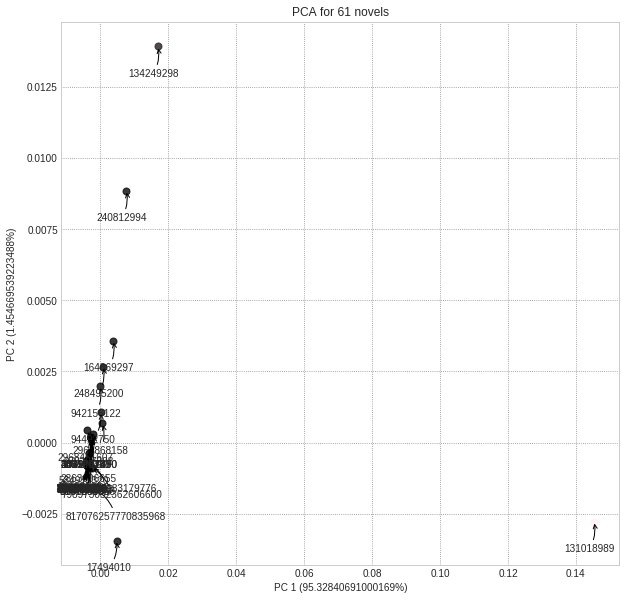

In [30]:
## generate color spectrum based on tag count of texts ---------
total_tag_counts_nparray = np.array(user_total_number_of_hashtags) # convert word count list into a numpy array
colors_for_tags = assign_text_colors_via_word_counts(total_tag_counts_nparray, user_total_number_of_hashtags)

## plot PCA data with labels and arrows
size_of_plot = 10
name_of_file = "pca-2017-01-29_hashtags_with_labels"
output_file = 1 # for PDF, output_flag = 1; for PNG, output_flag = 2; else output_flag = 0
plot_PCA_with_labels(pca_coordinates, pca_results, users, colors_for_tags, size_of_plot, output_file, name_of_file) # last two inputs are plot_size and output flag 


If you want to generate PCA plot without labels, uncomment the single hashes below and run code.

In [ ]:
## May need to run this code block twice to get it to display properly!

## generate color spectrum based on tag count of texts ----------
#total_tag_counts_nparray = np.array(user_total_number_of_hashtags) # convert word count list into a numpy array
#colors_for_tags = assign_text_colors_via_word_counts(total_tag_counts_nparray, user_total_number_of_hashtags)

##plot PCA without legend or tables -------
#size_of_plot = 12
#output_file = 0 # for PDF, output_flag = 1; for PNG, output_flag = 2; else output_flag = 0
#name_of_file = "pca-2017-01-29_hashtags"
#plot_PCA(pca_coordinates, pca_results, colors_for_tags, users, size_of_plot, output_file, name_of_file)  # last three inputs are plot_size, output flag, graph name

### Part 2, Section 2: Using words to invent communities

In [44]:
# get all words for each user; counts of all words for all users; 
# total number of words for all users; get all total number of all words;
# and words frequencies in corpus

user_words = []                 # list of lists of user word tokens
user_word_counts = []           # list of dicts of user word types
user_total_number_of_words = [] # list of number of words used by each user

for ID in range(0, len(users)):  
    temp_words = []
    words = tweets[tweets["user_id"]==users[ID]]["tweet_text"].tolist() #list of all hashtags for one user ID
    for tweet_wordlist in range(0,len(words)):  # for all hashtags for one user ID
        temp_words.extend(re.compile('\w+').findall(words[tweet_wordlist].lower())) # pull hashtag from one tweet and add to list
    user_words.append(temp_words)
    user_word_counts.append(count_words(user_words[ID])) 
    user_total_number_of_words.append(total_number_of_words(user_word_counts[ID])) 

# number of all tag tokens in tweet corpus
corpus_word_count = total_number_of_words_in_corpus(user_total_number_of_words)

# calculate frequencies for each hashtag in corpus
word_frequencies = word_freq(user_word_counts, corpus_word_count)

# TESTS
#print(user_words)
#print(user_word_counts)    
#print(user_total_number_of_words)
#print(corpus_word_count)
#print(word_frequencies)

In [45]:
## Inspect most frequent words (MFWs) ------------------
text_index_to_compare_MFWs = 0 # column identifer for a particular text; full list in "textnames"
MFWs= obtain_MFW(word_frequencies, text_index_to_compare_MFWs, str(users))


# Columns are individual texts (i.e., novels in this case), rows are words
MFWs.head(10) #list first 10 words for all users 

Columns are users/texts
Rows are words/hashtags


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
rt,0.000674,0.000090,0.000000,0.000000,0.000270,0.000000,0.000000,0.000000,0.000360,0.000000,...,0.000135,0.000000,0.000000,0.017717,0.000000,0.000135,0.000045,0.000135,0.000315,0.000135
repespaillat,0.000630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
to,0.000405,0.000045,0.000000,0.000045,0.000225,0.000135,0.000090,0.000090,0.000180,0.000045,...,0.000135,0.000090,0.000045,0.009982,0.000000,0.000135,0.000000,0.000135,0.000764,0.000270
https,0.000405,0.000090,0.000000,0.000045,0.000315,0.000045,0.000045,0.000180,0.000360,0.000000,...,0.000225,0.000045,0.000045,0.013040,0.000045,0.000135,0.000045,0.000000,0.000360,0.000090
you,0.000360,0.000000,0.000000,0.000000,0.000045,0.000000,0.000000,0.000000,0.000045,0.000000,...,0.000000,0.000000,0.000000,0.005351,0.000000,0.000000,0.000000,0.000045,0.000135,0.000135
the,0.000315,0.000045,0.000000,0.000045,0.000180,0.000045,0.000000,0.000045,0.000180,0.000000,...,0.000000,0.000045,0.000000,0.012501,0.000045,0.000180,0.000045,0.000000,0.000764,0.000045
t,0.000315,0.000090,0.000000,0.000045,0.000315,0.000135,0.000135,0.000180,0.000405,0.000000,...,0.000270,0.000045,0.000045,0.015828,0.000045,0.000180,0.000045,0.000000,0.000405,0.000135
co,0.000315,0.000000,0.000000,0.000045,0.000315,0.000045,0.000045,0.000180,0.000315,0.000000,...,0.000225,0.000045,0.000045,0.012411,0.000045,0.000135,0.000045,0.000000,0.000360,0.000045
of,0.000225,0.000090,0.000045,0.000000,0.000090,0.000000,0.000000,0.000000,0.000315,0.000000,...,0.000000,0.000045,0.000045,0.005396,0.000000,0.000045,0.000045,0.000045,0.000180,0.000090
for,0.000225,0.000045,0.000045,0.000000,0.000090,0.000000,0.000000,0.000045,0.000225,0.000045,...,0.000000,0.000000,0.000000,0.003732,0.000000,0.000000,0.000000,0.000000,0.000315,0.000090


In [46]:
## Perform PCA for users using hashtags 

text_index_to_compare_MFWs = 0 # column identifer for a particular text; full list in "textnames"
number_of_components = 2 # how many dimensions for PCA
number_of_MFWs_used = 0 #number of MFWs used to plot PCA graphs # if set to 0, will use all words
pca_coordinates, pca_results = PCAnalysis(word_frequencies, number_of_MFWs_used, corpus_word_count, number_of_components, text_index_to_compare_MFWs)

Corpus Word Count:22239
Using corpus word count (22239 words) for PCA in 2-dimensions...


/usr/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


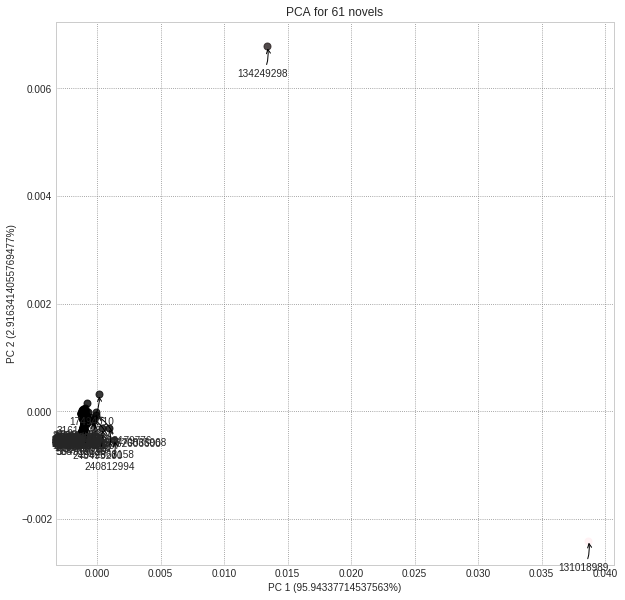

In [47]:
## generate color spectrum based on tag count of texts ---------
total_word_counts_nparray = np.array(user_total_number_of_words) # convert word count list into a numpy array
colors_for_words = assign_text_colors_via_word_counts(total_word_counts_nparray, user_total_number_of_words)

## plot PCA data with labels and arrows
size_of_plot = 10
name_of_file = "pca-2017-01-29_words_with_labels"
output_file = 1 # for PDF, output_flag = 1; for PNG, output_flag = 2; else output_flag = 0
plot_PCA_with_labels(pca_coordinates, pca_results, users, colors_for_tags, size_of_plot, output_file, name_of_file) # last two inputs are plot_size and output flag 


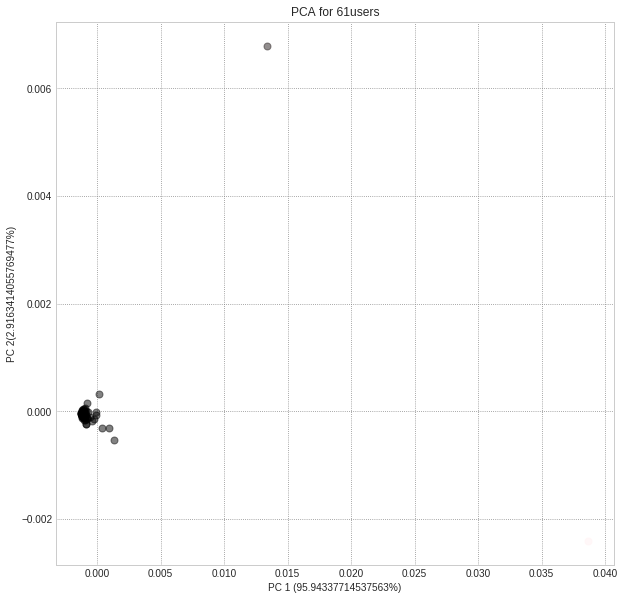

In [51]:
## May need to run this code block twice to get it to display properly!

## generate color spectrum based on tag count of texts ----------
total_word_counts_nparray = np.array(user_total_number_of_words) # convert word count list into a numpy array
colors_for_words = assign_text_colors_via_word_counts(total_word_counts_nparray, user_total_number_of_words)

##plot PCA without legend or tables -------
size_of_plot = 12
output_file = 0 # for PDF, output_flag = 1; for PNG, output_flag = 2; else output_flag = 0
name_of_file = "pca-2017-01-29_words"
plot_PCA(pca_coordinates, pca_results, colors_for_tags, users, size_of_plot, output_file, name_of_file)  # last three inputs are plot_size, output flag, graph name